In [19]:
# imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,log_loss,r2_score
import warnings
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor

In [4]:
boston_df = pd.read_csv(r'..\Cases\Boston Housing\Boston.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
x,y=boston_df.drop(['medv'],axis=1),boston_df[['medv']]
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [14]:
X_train,  X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=25)

In [21]:
depths = [2,3,4,None]
min_samples = [2,5, 10, 20, 50]
min_leaf = [1, 5,10, 20, 50]

scores = []
for d in depths:
    for l in min_leaf:
        for s in min_samples:
            dtc = DecisionTreeRegressor(random_state=25, max_depth=d, min_samples_split=s , min_samples_leaf=l)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            #print(y_pred.shap)
            scores.append([d, r2_score(y_test, y_pred), s, l])
df_scores = pd.DataFrame(scores, columns=['depths','acc_score', 'min_Sample', 'min_leaf'])
df_scores.sort_values('acc_score', ascending=False)
df_scores

,depths,acc_score,min_Sample,min_leaf
0,2.0,0.614184,2,1
1,2.0,0.614184,5,1
2,2.0,0.614184,10,1
3,2.0,0.614184,20,1
4,2.0,0.614184,50,1
...,...,...,...,...
95,NaN,0.618940,2,50
96,NaN,0.618940,5,50
97,NaN,0.618940,10,50
98,NaN,0.618940,20,50


<Axes: xlabel='Feature', ylabel='Importance'>

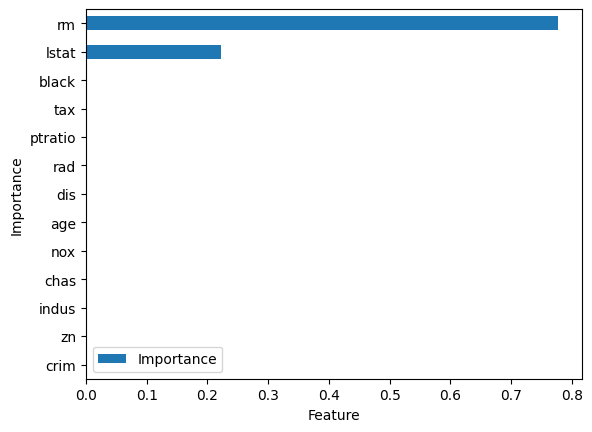

In [24]:
best_tree = DecisionTreeRegressor(random_state=25, max_depth=2, min_samples_split=2 , min_samples_leaf=1)
best_tree.fit(X_train,y_train)
df_imp = pd.DataFrame({'Feature' : list(X_train.columns), 'Importance': list(best_tree.feature_importances_)})
df_imp.columns

df_imp.sort_values('Importance').plot(kind='barh', x='Feature', xlabel='Feature', ylabel='Importance')

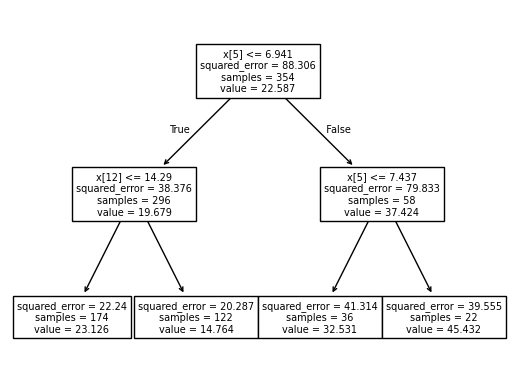

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plot_tree(best_tree)
plt.show()